# Investigating TMDB movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Business Problem and questions to be answered

<ul>
<li> what are top genres generating profits? </li>

<li> what are top 3 most popular movies? </li>
                
<li> what was the average revenue of the each genres ? </li>
                
<li> how much difference does the budget and adjusted budget had ? </li>
</ul>

In [72]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
#### creating a function called title_lables to make it easy when doing the plots and calling the function 
def title_lables (title:str, xlabel:str, ylabel:str):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### loading our dataset and investigating the first five rows 

In [74]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [75]:
#checking data types and overall non-null stats

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [76]:
#checking df shape to find number of rows and cols 

df.shape

(10866, 21)

In [77]:
#checking data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [78]:
#checking the statistic 
df.describe(include=['int64', 'float64'])

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning

In [79]:
#checking nulls 
df_null = df.isnull().sum()
df_null

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### dropping columns with significant null values
from checking nulls found that home page and tagline has significant number of rows null #dropping missing values #since homepage and tagline has so many null values we will drop them

In [80]:
cols_to_drop = ['homepage','tagline']

df = df.drop(columns = cols_to_drop)

df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [81]:
#double checking the nulls 
df_null = df.isnull().sum()
df_null


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

after chekcing null value found genres and director two important row has certain values as null 

so we fill genres and director with unknown value

In [ ]:
#after chekcing null value found genres and director two important row has certain values as null 
#fill genres and director with unknown value

df['director'].fillna('Unknown',inplace=True)
df['genres'].fillna('Unknown',inplace=True)

In [85]:
#fill overview and keywords with empty string ""

df['overview'].fillna("",inplace=True)
df['keywords'].fillna("",inplace=True)

In [86]:
#checking the nulls 
df_null = df.isnull().sum()
df_null


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                   0
keywords                   0
overview                   0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [87]:
#checking zero values in budget revenue and runtime
cols_to_check = ['budget', 'revenue', 'runtime']
print((df[cols_to_check] == 0).sum())

budget     5696
revenue    6016
runtime      31
dtype: int64


In [88]:
#handling zeros filling zeros with nan

df['budget'] = df['budget'].replace(0,np.nan)
df['revenue'] = df['revenue'].replace(0,np.nan)

In [89]:
#handling zero in runtime and filling nan with median
df['runtime'] = df['runtime'].replace(0,np.nan)
df['runtime'] = df['runtime'].fillna(df['runtime'].median())

In [90]:
#double checking zero values
cols_to_check = ['budget', 'revenue', 'runtime']
print((df[cols_to_check] == 0).sum())

budget     0
revenue    0
runtime    0
dtype: int64


In [91]:
df_null = df.isnull().sum()
df_null

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                   0
keywords                   0
overview                   0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [92]:
#checking number of duplicates 
df_duplicates = df.duplicated().sum()
print(df_duplicates)

1


In [93]:
#dropping duplicates 
df = df.drop_duplicates()


In [95]:
#cleaning geners , cast and changing date from object to date 

df['release_date'] = pd.to_datetime(df['release_date'])
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')

### since there is thousnads of rows with nan value in budget in order to have meaningfull finance reuslt we create and subset for our financce 

In [96]:
df_finance = df.dropna(subset=['budget','revenue']).copy()
#we using copy to tell panda that thsi dataframe is independant of original DF
df_finance.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,NaN,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,NaN,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [97]:
#calculating the profit 
df_finance['profit'] = df_finance['revenue_adj'] - df_finance['budget']

In [98]:
#checking if profit columns is created
df_finance.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,NaN,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,NaN,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.242446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,NaN,George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,NaN,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1.981613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,NaN,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,NaN,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.616190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,NaN,J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,NaN,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.702723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,NaN,James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,NaN,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.195749e+09


## Exploratory Data Analysis
now that the data is claned we need to answer to the business questions below
### Research Questions : 

                    what are top genres generating profits?
                    
                    what are top 3 most popular movies?
                    
                    what movie had the highest budget of all the time?
                    
                    what was the average revenue of the each genres ?
                    
                    how much difference does the budget and adjusted budget had ? 

In [103]:
df_finance['genres'] = df_finance['genres'].apply(
    lambda x: x.split('|') if isinstance(x, str) else x
)


In [107]:
df_finance['profit'].isna().sum()
len(df_finance)


3854

In [111]:
df_finance['budget'] = pd.to_numeric(df_finance['budget'], errors='coerce')



In [112]:
#find most profitalbe genre

#what are top genres generating profits?
genre_profit = df_finance.explode('genres')

#find average profit
top_genres = genre_profit.groupby('genres')['profit'].mean()
top_genres

Series([], Name: profit, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

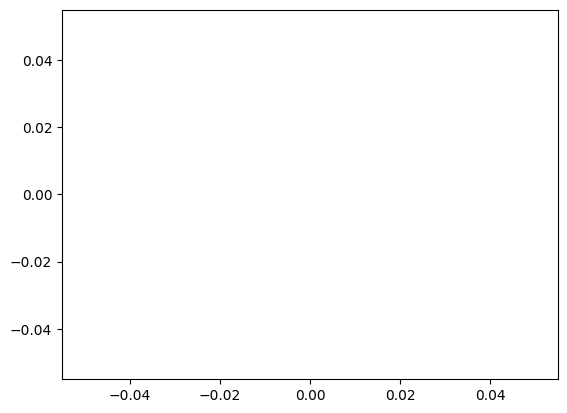

In [113]:
top_genres.plot(kind="barh")

title_lables("Top Genre","Popularity","Genres")